# dataset-eda

Use the "Run" button to execute the code.

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="dataset-eda")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kishkath/dataset-eda" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/kishkath/dataset-eda


'https://jovian.ai/kishkath/dataset-eda'

In [6]:
#!pip install jovian opendatasets --upgrade --quiet


In [7]:
import opendatasets as od
dataset_url = "https://www.kaggle.com/datasets/shrutimehta/zomato-restaurants-data"
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: imnskc
Your Kaggle Key: ········


100%|██████████| 5.47M/5.47M [00:00<00:00, 47.1MB/s]

In [8]:
data_dir = "./zomato-restaurants-data"

In [9]:
import os
from os import listdir

In [10]:
listdir(data_dir)

['zomato.csv',
 'file2.json',
 'file4.json',
 'file5.json',
 'file1.json',
 'Country-Code.xlsx',
 'file3.json']

In [11]:
## Libraries
import pandas as pd
import numpy as np
import copy
from copy import copy,deepcopy
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
zomato_data = pd.read_csv("./zomato-restaurants-data/zomato.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7044: invalid continuation byte

###  if error_type is as above:
'''
---------------------------------------------------------------------------
UnicodeDecodeError                        Traceback (most recent call last)
/tmp/ipykernel_37/3387912059.py in <module>
----> 1 zomato_data = pd.read_csv("./zomato-restaurants-data/zomato.csv")

/opt/conda/lib/python3.9/site-packages/pandas/util/_decorators.py in wrapper(*args, **kwargs)
    309                     stacklevel=stacklevel,
    310                 )
--> 311             return func(*args, **kwargs)
    312 
    313         return wrapper

/opt/conda/lib/python3.9/site-packages/pandas/io/parsers/readers.py in read_csv(filepath_or_buffer, sep, delimiter, header, names, index_col, usecols, squeeze, prefix, mangle_dupe_cols, dtype, engine, converters, true_values, false_values, skipinitialspace, skiprows, skipfooter, nrows, na_values, keep_default_na, na_filter, verbose, skip_blank_lines, parse_dates, infer_datetime_format, keep_date_col, date_parser, dayfirst, cache_dates, iterator, chunksize, compression, thousands, decimal, lineterminator, quotechar, quoting, doublequote, escapechar, comment, encoding, encoding_errors, dialect, error_bad_lines, warn_bad_lines, on_bad_lines, delim_whitespace, low_memory, memory_map, float_precision, storage_options)
    584     kwds.update(kwds_defaults)
    585 
--> 586     return _read(filepath_or_buffer, kwds)
    587 
    588 

/opt/conda/lib/python3.9/site-packages/pandas/io/parsers/readers.py in _read(filepath_or_buffer, kwds)
    480 
    481     # Create the parser.
--> 482     parser = TextFileReader(filepath_or_buffer, **kwds)
    483 
    484     if chunksize or iterator:

/opt/conda/lib/python3.9/site-packages/pandas/io/parsers/readers.py in __init__(self, f, engine, **kwds)
    809             self.options["has_index_names"] = kwds["has_index_names"]
    810 
--> 811         self._engine = self._make_engine(self.engine)
    812 
    813     def close(self):

/opt/conda/lib/python3.9/site-packages/pandas/io/parsers/readers.py in _make_engine(self, engine)
   1038             )
   1039         # error: Too many arguments for "ParserBase"
-> 1040         return mapping[engine](self.f, **self.options)  # type: ignore[call-arg]
   1041 
   1042     def _failover_to_python(self):

/opt/conda/lib/python3.9/site-packages/pandas/io/parsers/c_parser_wrapper.py in __init__(self, src, **kwds)
     67         kwds["dtype"] = ensure_dtype_objs(kwds.get("dtype", None))
     68         try:
---> 69             self._reader = parsers.TextReader(self.handles.handle, **kwds)
     70         except Exception:
     71             self.handles.close()

/opt/conda/lib/python3.9/site-packages/pandas/_libs/parsers.pyx in pandas._libs.parsers.TextReader.__cinit__()

/opt/conda/lib/python3.9/site-packages/pandas/_libs/parsers.pyx in pandas._libs.parsers.TextReader._get_header()

/opt/conda/lib/python3.9/site-packages/pandas/_libs/parsers.pyx in pandas._libs.parsers.TextReader._tokenize_rows()

/opt/conda/lib/python3.9/site-packages/pandas/_libs/parsers.pyx in pandas._libs.parsers.raise_parser_error()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7044: invalid continuation byte
'''

## Follow Next Steps

In [13]:
## Need to use encoding formats
## Press (Shift with Tab) under read_csv , can see formats

In [14]:
zomato_data = pd.read_csv("./zomato-restaurants-data/zomato.csv",encoding="latin-1")

In [15]:
## Create copies of data
zomato1 = deepcopy(zomato_data)
zomato2 = deepcopy(zomato_data)
zomato3 = deepcopy(zomato_data)

In [16]:
zomato_data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [17]:
print(f"Zomato.csv has {zomato_data.shape[0]} rows and {zomato_data.shape[1]} columns")

Zomato.csv has 9551 rows and 21 columns


In [18]:
print('Columns of Zomato.csv: \n\n',zomato_data.columns)

Columns of Zomato.csv: 

 Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [19]:

# Information about zomato.csv

zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [20]:
## Description of statistics of dataset
zomato_data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


**Note: Can see only numerical column values are described as we are doing statistics such as mean,median, outliers**


### Things can Do:

1. Missing Values
2. Exploration of Numerical columns.
3. Exploration of Categorical columns.
4. Finding Relationship Between Features.

In [21]:
## Missing value count of all columns

zomato_data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [22]:
## Lets get only columns with null values

zomato_data.isnull().sum()>0

Restaurant ID           False
Restaurant Name         False
Country Code            False
City                    False
Address                 False
Locality                False
Locality Verbose        False
Longitude               False
Latitude                False
Cuisines                 True
Average Cost for two    False
Currency                False
Has Table booking       False
Has Online delivery     False
Is delivering now       False
Switch to order menu    False
Price range             False
Aggregate rating        False
Rating color            False
Rating text             False
Votes                   False
dtype: bool

In [23]:
# Type1:
[feature for feature in zomato_data if zomato_data[feature].isnull().sum()>0]

['Cuisines']

In [24]:
# Type2:
zomato_data.columns[zomato_data.isnull().any()]

Index(['Cuisines'], dtype='object')

In [25]:
## To get all non-NA columns
zomato_data.columns[~zomato_data.isnull().any()]

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

<AxesSubplot:>

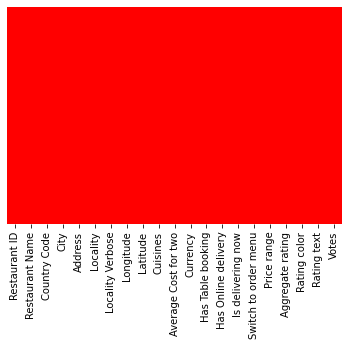

In [26]:
## Displaying with HeatMAp
# cbar : colorbar

sns.heatmap(zomato_data.isnull(),yticklabels=False,cbar=False,cmap='autumn')

**note: Becoz of lesser null values in column, it is not visible**

# B. Will Deal with Country_code.xlsx

In [29]:
country_code = pd.read_excel("./zomato-restaurants-data/Country-Code.xlsx")

In [30]:
country1 = deepcopy(country_code)
country2 = deepcopy(country_code)
country3 = deepcopy(country_code)

In [31]:
country_code.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [32]:
print(f"Country_code.xlsx has {country_code.shape[0]} rows and {country_code.shape[1]} columns")

Country_code.xlsx has 15 rows and 2 columns


In [33]:
country_code.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [34]:
## columns of country_code
country_code.columns

Index(['Country Code', 'Country'], dtype='object')

In [35]:
## Information about country_code

country_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes


In [36]:
## describe 

country_code.describe()

,Country Code
count,15.000000
mean,137.933333
std,80.009345
min,1.000000
25%,65.500000
50%,166.000000
75%,199.500000
max,216.000000


In [37]:
## Check for Null values

country_code.isnull().sum()

Country Code    0
Country         0
dtype: int64

In [38]:
### Checking zomato.csv columns

zomato_data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

**Note: Country_code.xlsx columns are present in Zomato.csv**

- We can Merge both of data(.csv & .xlsx)

In [39]:
final_data = pd.merge(zomato_data,country_code,on='Country Code',how='left')

In [40]:
final_data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

**Note: Can see "Country" column from Country_code.xlsx has been merged with Zomato.csv at the end**

In [41]:
final_data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [42]:
jovian.commit("dataset-eda")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kishkath/dataset-eda" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/kishkath/dataset-eda


'https://jovian.ai/kishkath/dataset-eda'

In [46]:
country_count = final_data.Country.value_counts()
print(country_count)

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64


In [55]:
country_names=country_count.index
print(country_names)

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')


**We can conclude that maximum users/transactions of zomato happen in India**

In [51]:
country_val = country_count.values
print(country_val)

[8652  434   80   60   60   60   40   34   24   22   21   20   20   20
    4]


([<matplotlib.patches.Wedge at 0x7fecda443550>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

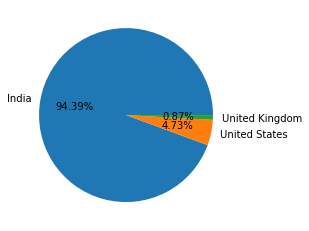

In [62]:
## PieChart - Top3 countries that uses zomato
plt.pie(country_val[:3],labels=country_names[:3],autopct = "%1.2f%%")

**India has first place in zomato consumership followed by United States and United Kingdom**

In [63]:
final_data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [77]:
ratings=final_data.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating count'})

In [79]:
ratings

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [84]:
ratings.groupby('Rating color').size()

Rating color
Dark Green     5
Green          5
Orange        10
Red            7
White          1
Yellow         5
dtype: int64

#### Inference:

1. 301 Ratings are between 4.5 and 5 meant to be excellent service and food.
2. 318 Ratings are between 4.0 and 4.5 meant to be very good service.
3. 2100 Ratings are between 3.5 and 4.0 meant to good service.
4. 1962 Ratings are between 2.5 and 3.5 meant to be average service.
5. 186 Ratings are between 1.0 and 2.5 meant to be poor service.
6. 2148 users havent rated.

- Maximum Ratings are between 3.5 and 4 that are of good service.

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating count'>

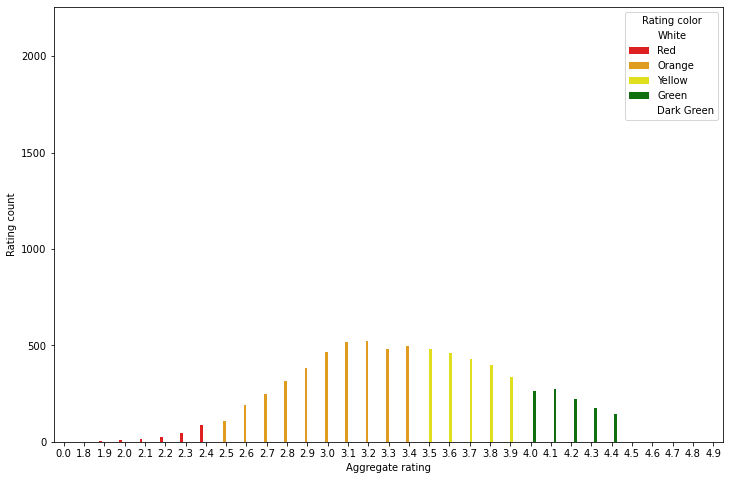

In [95]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,8)
sns.barplot(x='Aggregate rating',y='Rating count',hue='Rating color',data=ratings,palette=['white','red','orange','yellow','green',])

<AxesSubplot:xlabel='Rating color', ylabel='count'>

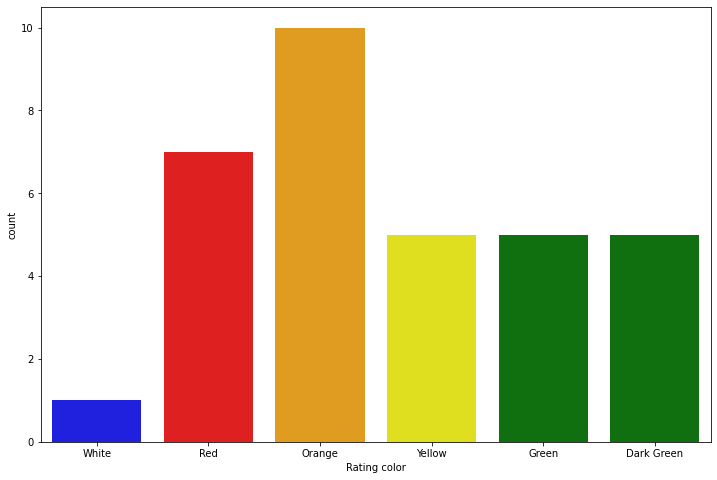

In [96]:
##Count plot
sns.countplot(x="Rating color",data=ratings,palette=['blue','red','orange','yellow','green','green'])

In [109]:
# Find the countries name that has given 0 rating 
final_data[final_data['Aggregate rating']==0].groupby('Country').size().reset_index().sort_values(0,ascending=False)

,Country,0
1,India,2139
0,Brazil,5
3,United States,3
2,United Kingdom,1


**Maximum bad service ratings are from India followed by Brazil and United states.**`

In [112]:
# Find out which currency is used by which country.

final_data[['Country','Currency']].groupby(['Country','Currency']).size().reset_index().sort_values(0)

,Country,Currency,0
2,Canada,Dollar($),4
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
10,Sri Lanka,Sri Lankan Rupee(LKR),20
4,Indonesia,Indonesian Rupiah(IDR),21
6,Phillipines,Botswana Pula(P),22
0,Australia,Dollar($),24
11,Turkey,Turkish Lira(TL),34
5,New Zealand,NewZealand($),40
1,Brazil,Brazilian Real(R$),60


In [113]:
final_data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [123]:
## Country with Online Delivers

final_data[final_data['Has Online delivery']=='Yes'].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

**Only India and UAE Has Online Delivery**

In [127]:
## Pie chart for cities Distribution
city_values = final_data.City.value_counts().values
city_labels=final_data.City.value_counts().index


([<matplotlib.patches.Wedge at 0x7fecd970fa60>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

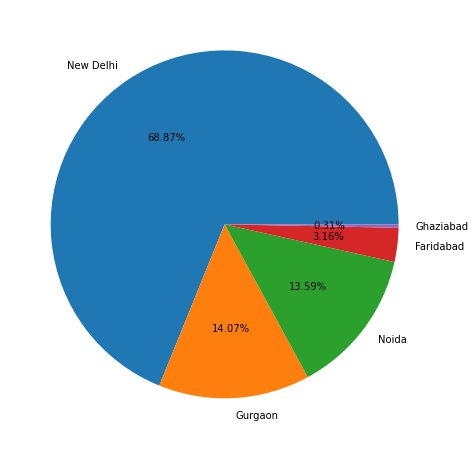

In [128]:
plt.pie(city_values[:5],labels=city_labels[:5],autopct='%1.2f%%')

In [133]:
jovian.commit("dataset-eda")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kishkath/dataset-eda" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/kishkath/dataset-eda


'https://jovian.ai/kishkath/dataset-eda'

In [132]:
# Q) Find top 10 cuisines

In [130]:
print("The End!")

The End!
